# THIS IS MY_COVID_BUDDY APP


OBJECTIVE: The objective of this app is to serve as a resource for advicing users on COVID-related issues. From how to keep safe all the way to realtime numbers of cases in the United Kingdom as well as contacting the NHS in case of COVID related emergencies using Natural Language Processing driven chatbot.

## Conversation Architecture

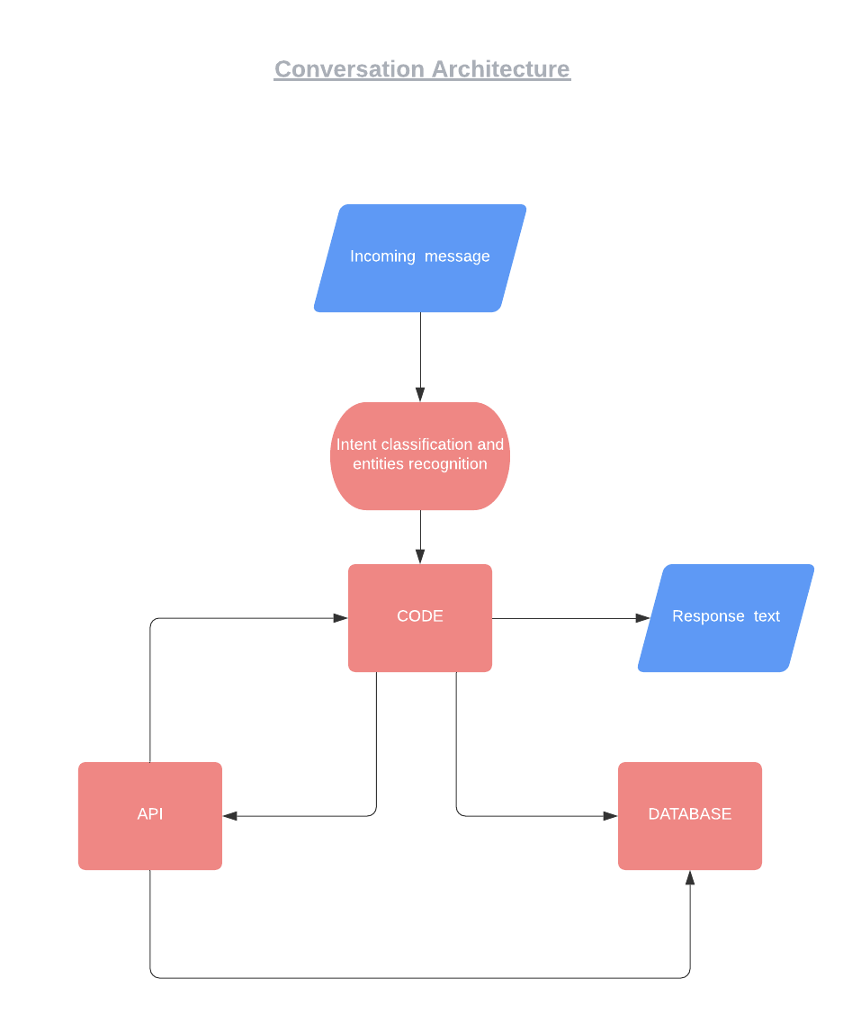

## I USED WIT.AI TO BUILD MY CHATBOT

APP LINK:  https://wit.ai/apps/818941638745462/understanding

In [1]:
from wit import Wit

client = Wit('6YNOQBENTGJ77VHNVTSERTRNZVDDQGVT')

### CONVERSATIONAL FLOW DIAGRAM



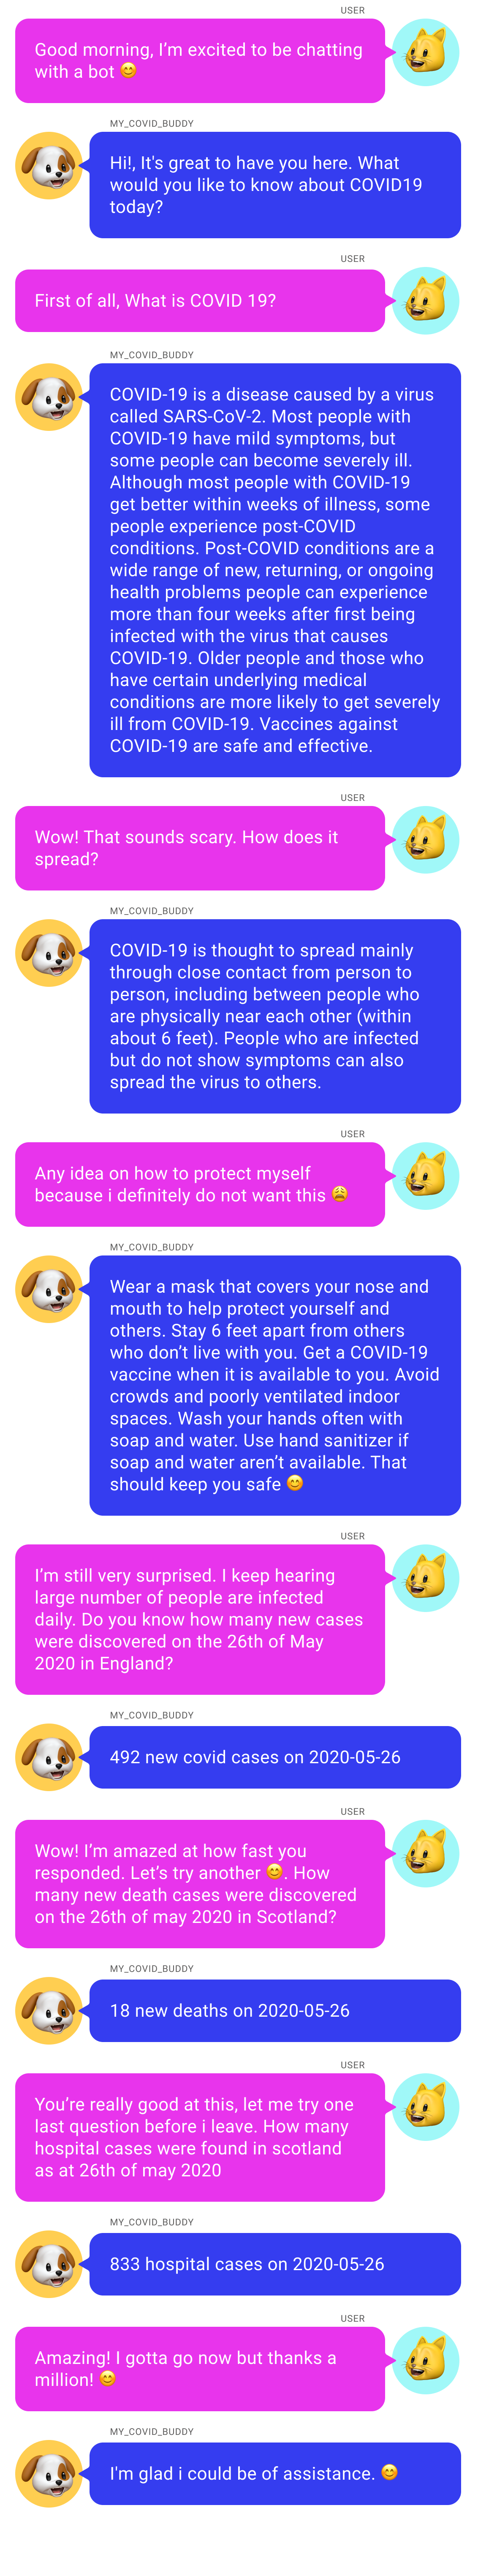

## DECLARATION OF FUNCTION TO REPLY THE CLIENT BASED ON INTENT

In [2]:
def reply_client(r):
    
    if r.get('intents'):
        intent = r.get('intents')[0].get('name')    
        if intent == 'defineCovid19':
            responseText = defineCovid19()
            return responseText
        elif intent == 'howDoesTheVirusSpread':
            responseText = howDoesTheVirusSpread()
            return responseText
        elif intent == 'howCanIProtectMyself':
            responseText = howCanIProtectMyself()
            return responseText
        elif intent == 'thanks':
            responseText = thanks()
            return responseText
        elif intent == 'iFeelSick':
            responseText = iFeelSick()
            return responseText
        elif intent == 'covidSymptoms':
            responseText = covidSymptoms()
            return responseText
        elif intent == 'contactTracing':
            responseText = contactTracing()
            return responseText
        elif intent == 'getNoOfNewCases':
            location = r.get('entities').get('wit$location:location')[0].get('body')
            dateEntered =r.get('entities').get('wit$datetime:datetime')[0].get('value')
            dateEntered =  (dateEntered[0:10])
            responseText = getNoOfNewCases(location,dateEntered)
            return responseText
        elif intent == 'getCumNoOfNewCases':
            location = r.get('entities').get('wit$location:location')[0].get('body')
            dateEntered =r.get('entities').get('wit$datetime:datetime')[0].get('value')
            dateEntered =  (dateEntered[0:10])
            responseText = getCumNoOfNewCases(location,dateEntered)
            return responseText
        elif intent == 'getNoOfNewDeaths':
            location = r.get('entities').get('wit$location:location')[0].get('body')
            dateEntered =r.get('entities').get('wit$datetime:datetime')[0].get('value')
            dateEntered =  (dateEntered[0:10])
            responseText= getNoOfNewDeaths(location,dateEntered)
            return responseText
        elif intent == 'getCumNoOfDeaths':
            location = r.get('entities').get('wit$location:location')[0].get('body')
            dateEntered =r.get('entities').get('wit$datetime:datetime')[0].get('value')
            dateEntered =  (dateEntered[0:10])
            responseText = getCumNoOfDeaths(location,dateEntered)
            return responseText
        elif intent == 'getNoOfHospitalCases':
            location = r.get('entities').get('wit$location:location')[0].get('body')
            dateEntered =r.get('entities').get('wit$datetime:datetime')[0].get('value')
            dateEntered =  (dateEntered[0:10])
            responseText = getNoOfHospitalCases(location,dateEntered)
            return responseText
        else:
            responseText = "I apologise, i dont know the answer to that yet. But i would learn eventually"
            return responseText 

### DEFINITIONS AND NUMERICAL DATA WERE OBTAINED FROM 'CENTRE FOR DISEASE AND CONTROL WEBSITE' AND 'CORONA VIRUS UK SITE' SO THEIR AUTHENTICITY IS GUARANTEED
https://www.cdc.gov/coronavirus/2019-ncov/faq.html
https://coronavirus.data.gov.uk/

## DECLARATION OF FUNCTIONS

In [3]:
def greet_client():
        return "Hi!, It's great to have you here. What would you like to know about COVID19 today?"

In [4]:
def defineCovid19():
    info ="COVID-19 is a disease caused by a virus called SARS-CoV-2. Most people with COVID-19 have mild symptoms, but some people can become severely ill. Although most people with COVID-19 get better within weeks of illness, some people experience post-COVID conditions. Post-COVID conditions are a wide range of new, returning, or ongoing health problems people can experience more than four weeks after first being infected with the virus that causes COVID-19. Older people and those who have certain underlying medical conditions are more likely to get severely ill from COVID-19. Vaccines against COVID-19 are safe and effective."
    return info
    

In [5]:
def howDoesTheVirusSpread():
    info = 'COVID-19 is thought to spread mainly through close contact from person to person, including between people who are physically near each other (within about 6 feet). People who are infected but do not show symptoms can also spread the virus to others.'
    return info

In [6]:
def howCanIProtectMyself():
    info = "Wear a mask that covers your nose and mouth to help protect yourself and others. Stay 6 feet apart from others who don’t live with you. Get a COVID-19 vaccine when it is available to you. Avoid crowds and poorly ventilated indoor spaces. Wash your hands often with soap and water. Use hand sanitizer if soap and water aren’t available. That should keep you safe 😊"
    return info


In [7]:
def iFeelSick():
    info = 'You need to stay home except to get medical care, Isolate yourself from others including those in your household and call the NHS dedicated helpline on 111.'
    return info

In [8]:
def covidSymptoms():
    info = "Fever, Cough, Headaches, Fatigue, Muscle or body aches, Loss of taste or smell, Sore throat, Nausea, Diarrhea, Difficulty breathing and chest pain"
    return info

In [9]:
def contactTracing():
    info = "Contact tracing has been used for decades by state and local health departments to slow or stop the spread of infectious diseases by Letting people know they may have been exposed to COVID-19 and should monitor their health for signs and symptoms of COVID-19,Helping people who may have been exposed to COVID-19 get tested and asking people to self-isolate if they have COVID-19 or self-quarantine if they are a close contact of someone with COVID-19"
    return info

In [10]:
def thanks():
    info = "I'm glad i could be of assistance. 😊"
    return info

In [11]:
def getNoOfNewCases(location, dateEntered):
    from requests import get
    def get_data(url):
        response = get(endpoint, timeout=10)

        if response.status_code >= 400:
            raise RuntimeError(f'Request failed: { response.text }')

        return response.json()
    
    if __name__ == '__main__':
        endpoint = (
            'https://api.coronavirus.data.gov.uk/v1/data?'
            'filters=areaType=nation;areaName='+str(location)+';date='+dateEntered+'&'
            'structure={"date":"date","newCases":"newCasesByPublishDate","cumCasesByPublishDate":"cumCasesByPublishDate"}'
        )
        data = get_data(endpoint)
        newCases=(data['data'][0]['newCases'])
        print(str(newCases) +' new covid cases on '+str(dateEntered)+'')

In [12]:
def getCumNoOfNewCases(location, dateEntered):
    from requests import get
    def get_data(url):
        response = get(endpoint, timeout=10)

        if response.status_code >= 400:
            raise RuntimeError(f'Request failed: { response.text }')

        return response.json()
    
    if __name__ == '__main__':
        endpoint = (
            'https://api.coronavirus.data.gov.uk/v1/data?'
            'filters=areaType=nation;areaName='+str(location)+';date='+dateEntered+'&'
            'structure={"date":"date","newCases":"newCasesByPublishDate","cumCasesByPublishDate":"cumCasesByPublishDate"}'
        )
        data = get_data(endpoint)
        cumulativeCases=(data['data'][0]['cumCasesByPublishDate'])
        print(str(cumulativeCases) +' cumulative new cases on '+str(dateEntered)+'')

In [13]:
def getNoOfNewDeaths(location, dateEntered):
    from requests import get
    def get_data(url):
        response = get(endpoint, timeout=10)

        if response.status_code >= 400:
            raise RuntimeError(f'Request failed: { response.text }')

        return response.json()
    
    if __name__ == '__main__':
        endpoint = (
            'https://api.coronavirus.data.gov.uk/v1/data?'
            'filters=areaType=nation;areaName='+str(location)+';date='+dateEntered+'&'
            'structure={"date":"date","newCases":"newCasesByPublishDate","cumCasesByPublishDate":"cumCasesByPublishDate","cumCasesByPublishDate":"cumCasesByPublishDate","newDeaths":"newDeathsByPublishDate","cumDeathsByPublishDate":"cumDeathsByPublishDate"}'
        )
        data = get_data(endpoint)
        newDeaths=(data['data'][0]['newDeaths'])
        print(str(newDeaths) +' new deaths on '+str(dateEntered)+'')

In [14]:
def getCumNoOfDeaths(location, dateEntered):
    from requests import get
    def get_data(url):
        response = get(endpoint, timeout=10)

        if response.status_code >= 400:
            raise RuntimeError(f'Request failed: { response.text }')

        return response.json()
    
    if __name__ == '__main__':
        endpoint = (
            'https://api.coronavirus.data.gov.uk/v1/data?'
            'filters=areaType=nation;areaName='+str(location)+';date='+dateEntered+'&'
            'structure={"date":"date","newCases":"newCasesByPublishDate","cumCasesByPublishDate":"cumCasesByPublishDate","cumCasesByPublishDate":"cumCasesByPublishDate","newDeaths":"newDeathsByPublishDate","cumDeathsByPublishDate":"cumDeathsByPublishDate"}'
        )
        
    data = get_data(endpoint)
    cumulativeDeaths=(data['data'][0]['cumDeathsByPublishDate'])
    print(str(cumulativeDeaths) +' cumulative deaths on '+str(dateEntered)+'')

In [15]:
def getNoOfHospitalCases(location, dateEntered):
    from requests import get
    def get_data(url):
        response = get(endpoint, timeout=10)

        if response.status_code >= 400:
            raise RuntimeError(f'Request failed: { response.text }')

        return response.json()
    
    if __name__ == '__main__':
        endpoint = (
            'https://api.coronavirus.data.gov.uk/v1/data?'
            'filters=areaType=nation;areaName='+str(location)+';date='+dateEntered+'&'
            'structure={"date":"date","hospitalCases":"hospitalCases"}'
        )
        
    data = get_data(endpoint)
    hospitalCases=(data['data'][0]['hospitalCases'])
    print(str(hospitalCases) +' hospital cases on '+str(dateEntered)+'')

In [16]:
def respondToClient(clientMessage):
    x = client.message(clientMessage)
    a = reply_client(x)
    return a

## Please note that the app returns exact numbers for countries in the United Kingdom

In [17]:
x=client.message('how many new covid cases were found in scotland on the 10th of march 2021')
a=reply_client(x)
a

691 new covid cases on 2021-03-10


In [18]:
x = client.message('how many covid cases were found in england on the 12th of may 2021')
a=reply_client(x)

1804 new covid cases on 2021-05-12


In [19]:
x = client.message('what was the cumulative number of new covid cases in england on the 12th of may 2021')
a= reply_client(x)

3880345 cumulative new cases on 2021-05-12


In [20]:
x = client.message('how many covid cases were found in england on the 26th of may 2021')
a=reply_client(x)

2540 new covid cases on 2021-05-26


In [21]:
x = client.message('cumulative covid cases found in england as at 26th of may 2021')
a=reply_client(x)

3902160 cumulative new cases on 2021-05-26


In [22]:
x = client.message('how many new cases were found in england as at 26th of may 2020')
a=reply_client(x)

492 new covid cases on 2020-05-26


In [23]:
x = client.message('how many new cases were found in scotland as at 26th of may 2020')
a=reply_client(x)

29 new covid cases on 2020-05-26


In [24]:
x = client.message('how many cumulative deaths were found in scotland as at 26th of may 2020')
a=reply_client(x)

None cumulative deaths on 2020-05-26


In [25]:
x = client.message('how many new deaths were found in scotland as at 26th of may 2020')
a=reply_client(x)

None new deaths on 2020-05-26


In [26]:
x = client.message('how many hospital were found in wales as at 26th of may 2020')
a=reply_client(x)

436 hospital cases on 2020-05-26


In [27]:
x = client.message('Define covid')
a=reply_client(x)

In [28]:
x = client.message('how does covid spread')
a=reply_client(x)

In [29]:
x = client.message('how does the virus spread')
a=reply_client(x)

In [30]:
x = client.message('how does covid19 spread')
a=reply_client(x)

In [31]:
x = client.message('do you know how covid19 spreads')
a=reply_client(x)

In [32]:
respondToClient('Good afternoon')

'I apologise, i dont know the answer to that yet. But i would learn eventually'

In [33]:
respondToClient('Can you please explain to me what is covid 19')

'COVID-19 is a disease caused by a virus called SARS-CoV-2. Most people with COVID-19 have mild symptoms, but some people can become severely ill. Although most people with COVID-19 get better within weeks of illness, some people experience post-COVID conditions. Post-COVID conditions are a wide range of new, returning, or ongoing health problems people can experience more than four weeks after first being infected with the virus that causes COVID-19. Older people and those who have certain underlying medical conditions are more likely to get severely ill from COVID-19. Vaccines against COVID-19 are safe and effective.'

In [34]:
respondToClient('I understand a bit about covid, thanks to you. but how does it spread')

'COVID-19 is thought to spread mainly through close contact from person to person, including between people who are physically near each other (within about 6 feet). People who are infected but do not show symptoms can also spread the virus to others.'

In [35]:
respondToClient('How can i protect myself from COVID')

'Wear a mask that covers your nose and mouth to help protect yourself and others. Stay 6 feet apart from others who don’t live with you. Get a COVID-19 vaccine when it is available to you. Avoid crowds and poorly ventilated indoor spaces. Wash your hands often with soap and water. Use hand sanitizer if soap and water aren’t available. That should keep you safe 😊'

In [36]:
respondToClient('I dont feel too well')

'You need to stay home except to get medical care, Isolate yourself from others including those in your household and call the NHS dedicated helpline on 111.'

In [37]:
respondToClient('How many new cases of covid were recorded on the 8th of august 2020 in england')

679 new covid cases on 2020-08-08


In [38]:
respondToClient('How many hospital cases of covid were recorded on the 9th of june 2020 in scotland')

647 hospital cases on 2020-06-09


In [39]:
respondToClient('How many cumulative new cases of covid were recorded on the 3rd of july 2020 in scotland')

18276 cumulative new cases on 2020-07-03


In [40]:
respondToClient('what was the cumulative death cases found on the 2nd of july 2020 in wales ')

None cumulative deaths on 2020-07-02


In [41]:
respondToClient('Thanks a million')

"I'm glad i could be of assistance. 😊"